# Analysis and Visualization of Complex Data
---
## Exercise 01 - Creating a word cloud in Python

In this exercise you will produce your personal word cloud using python

First we will need to install Wordcloud package (someone already did the most difficult job - a function that produces a word cloud - so let's take advantage of that!)

```
$ git clone https://github.com/amueller/word_cloud.git
$ cd word_cloud
$ pip install .
```

Import required packages

In [1]:
import pandas as pd
import numpy as np
import os # provides functions for interacting with the operating system
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

Let us first use an example from a Wine review database from www.Kaggle.com, named ["Wine Reviews"](https://www.kaggle.com/zynicide/wine-reviews/data). You can find the csv dataset in the class [github repository](https://github.com/isa-ulisboa/greends-avcd/tree/main/Examples)

You may clone it to your local machine.

First check your current directory:

In [2]:
os.getcwd()

'/Users/tristanbertrand/Desktop/IA_2_supagro/ISA_ERASMUS/Data_sciences/ACVD'

You may change the directory to which you want to clone the github repository (change path accordingly):

In [11]:
os.chdir("/Users/tristanbertrand/Desktop/IA_2_supagro/ISA_ERASMUS/Data_sciences/ACVD")
os.getcwd()

'/Users/tristanbertrand/Desktop/IA_2_supagro/ISA_ERASMUS/Data_sciences/ACVD'

Now you clone the github repository to your local machine:

```
$ git clone https://github.com/isa-ulisboa/greends-avcd.git
```

Now you can import the wine review dataset:

In [13]:
df = pd.read_csv("/Users/tristanbertrand/Desktop/IA_2_supagro/ISA_ERASMUS/Data_sciences/ACVD/greends-avcad-2024/examples/winemag-data-130k-v2.csv", index_col=0)

Check table (first 5 rows):

In [14]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Table summary:

In [15]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 129971 observations and 13 features in this dataset. 



Check only part of the table ("country", "description" and "points")

In [16]:
df[["country", "description","points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


Now let us run the wordcloud function with the imported data.

First it might be helpfull to get some info about wordcloud package:

In [17]:
?WordCloud

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2

Combine all wine reviews into one big text and create a big fat cloud to see which characteristics are most common in these wines.

In [18]:
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31661071 words in the combination of all review.


Create stopword list (words that you don't want to include - make a test first and choose words accordingly):

In [19]:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

Generate and display a word cloud image

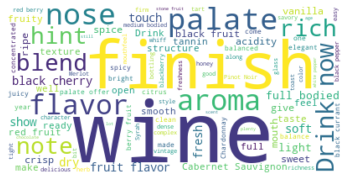

In [20]:
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

NOTE: You've probably noticed the argument interpolation="bilinear" in the plt.imshow(). This is to make the displayed image appear more smoothly. For more information about the choice, here is a helpful link to explore more about this choice.

# Create your personal word cloud

In this exercise you will adapt the code below using the keywords that best describe your interests. For that you may use the text from your CV, a motivation letter or simply a list keywords. First create and save a txt file (no commas or semicolons) containing your text.

I used a text file with a list of my publications (Note: the text was converted to csv and all punctuation marks were converted to "space".

In [29]:

import PyPDF2

# Chemin vers le fichier PDF
pdf_file_path = "/Users/tristanbertrand/Desktop/IA_2_supagro/ISA_ERASMUS/Data_sciences/ACVD/word_cloud/Lettre_de_motivation_Tristan_BERTRAND_Roscoff.pdf"

# Ouvrir le fichier PDF en mode binaire ('rb')
with open(pdf_file_path, "rb") as file:
    # Initialisation du lecteur PDF
    pdf_reader = PyPDF2.PdfReader(file)
    
    text = ""
    
    # Parcourir chaque page du PDF
    for page_num in range(len(pdf_reader.pages)):
        # Extraire le texte de la page
        page = pdf_reader.pages[page_num]
        text += page.extract_text()
        
# Afficher le texte extrait
print(text)

Tristan BERTRAND
Madame Romac,
Étant actuellement en deuxième année de mon cursus en ingénierie agronome
à l'Institut Agro Montpellier, je suis à la recherche d'un stage dans une unité de
recherche en biologie marine. C'est avec  enthousiasme que je vous adresse ma
candidature pour un stage de recherche de deux a six mois au sein de l’équipe
ECOMAP, a partir de juillet 2024.
La Station Biologique  de Roscoff et en particulier l’équipe ECOMAP aborde des
thématiques qui m'ont toujours captivé, notamment l'évolution des organismes et
des écosystèmes marins en réponse au changement climatique et aux pressions
anthropiques. L'étude des mécanismes génétiques d'adaptation des organismes
marins et de leurs populations m'intéresse particulièrement. Ces sujets me
semblent essentiels notamment compte tenu des avancées récentes dans les
outils de biologie moléculaire tels que l'ADN environnemental et le
métabarcoding. Ces techniques permettent une analyse fine et exhaustive de la
diversité génétiq

Create stopword list (words that you don't want to include - make a test first and choose words accordingly):

In [41]:
stopwords = set(STOPWORDS)
stopwords.update(["en", "et", "la", "une", "des", "le", "à", "Ce", "dans", "vous", "pour", "que", "un", "je", "mon", "ma", "les", "suis", "ces", "sur", "J'ai", "moi", "Cette", "au", "Rebelo", "Neves", "Pereira", "Pont", "Costa", "Feld", "Journal", "Using", "Research", "scitotenv", "J", "P", "G", "M", "V", "J","F", "T", "N" ,"C", "B", "S", "W", "de", "https", "D", "L", "E", "Science", "org", "Total", "Environment"])

#### Generate and display a word cloud image

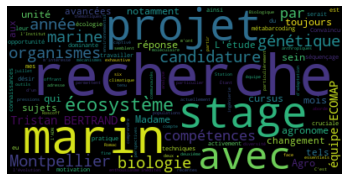

In [42]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NOTE: You've probably noticed the argument interpolation="bilinear" in the plt.imshow(). This is to make the displayed image appear more smoothly. For more information about the choice, here is a helpful link to explore more about this choice.

Set max_font_size, change the maximum number of word and lighten the background:

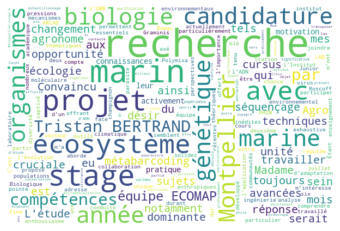

In [43]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=70, background_color="white", width=600, height=400,).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Save the image in the img folder:

In [44]:
wordcloud.to_file("wordcloud_PS.png")

## Plotting word clouds using shapes

You may also choose to plot your keywords within a given shape (e.g. that are related with your interests).

Firt import the "image" module of the Python Imaging Library (PIL):

In [45]:
from PIL import Image

Now you will need an image (e.g. in png format) in which the background has the value 255. Copy into your current directory. You may check it this way:

In [55]:
turtle_mask = np.array(Image.open("/Users/tristanbertrand/Desktop/IA_2_supagro/ISA_ERASMUS/Data_sciences/ACVD/word_cloud/Unknown-1.jpeg"))
turtle_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

Check mask

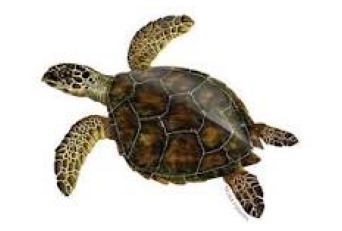

In [56]:
turtle_mask = np.array(Image.open("/Users/tristanbertrand/Desktop/IA_2_supagro/ISA_ERASMUS/Data_sciences/ACVD/word_cloud/Unknown-1.jpeg"))
#turtle_mask[230:250, 240:250]
plt.imshow(turtle_mask)
plt.axis("off")
plt.show()

And finally you may create, export and print the wordcloud

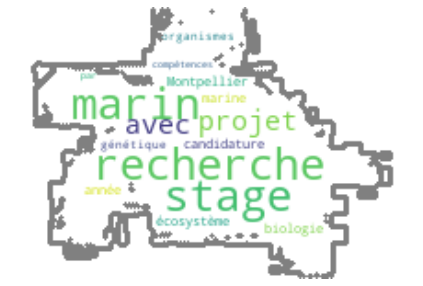

In [57]:
wc = WordCloud(background_color="white",
                  max_words=1000, 
                  mask=turtle_mask,
                  stopwords=stopwords,
                  contour_width=2,
                  repeat=True,
                  max_font_size=50,
                  contour_color='grey')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("turtle_wordcloud.png")

# show
plt.figure(figsize=[10,5])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Questions
- The world cloud you just produced is based on how many variables? 

- Which is the type of each variable in your word cloud?

# References
[Generating WordClouds in Python Tutorial](https://www.datacamp.com/tutorial/wordcloud-python)

[Python Wordcloud Tutorial](https://python-course.eu/applications-python/python-wordcloud-tutorial.php)

[How to create a word cloud in Python?](https://www.projectpro.io/recipes/create-word-cloud-python)